In [22]:
from scipy.stats import pearsonr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [9]:

df = pd.read_csv('cleaned_dataset.csv')
df

,Unnamed: 0,Gender,Age,Highest level of education,Marital Status,Have used online shopping platforms before,Professional Background,General E-Commerce Platforms,Specialty Online Stores / automobile,Online pharmacies,...,Q50,Q51,Q52,Q53,Q54,Q56,Q57,Q58,Q59,Made online purchases
0,0,Male,25 - 35,Bachelor's Degree,Single,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk",NaN,NaN,...,-1,0,0,0,0,0,0,-1,0,Yes
1,1,Male,25 - 35,Bachelor's Degree,Single,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk",Patpat.lk,"Epharma.Lk, Onlinepharmacy.Lk",...,1,0,1,0,1,1,1,1,1,Yes
2,2,Female,25 - 35,Bachelor's Degree,Single,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk, Kapruka.Com","Patpat.lk, Riyasewana.lk","Healthguard.Lk, Onlinepharmacy.Lk",...,0,1,2,1,1,1,2,2,1,Yes
3,3,Female,25 - 35,Master's Degree or higher,Married,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk",LankaVehicle.com,Onlinepharmacy.Lk,...,1,0,1,0,1,1,1,1,1,Yes
4,4,Male,25 - 35,Bachelor's Degree,Married,Yes,Employed (full-time),"Daraz.Lk, Wow.Lk",Riyasewana.lk,"Ceymed.Lk, Epharma.Lk",...,1,1,1,1,0,1,1,1,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,831,Male,25 - 35,Master's Degree or higher,Single,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk, Kapruka.Com, Takas.Lk","AutoLanka.com, PriceLanka.lk",NaN,...,0,1,1,-1,1,1,1,1,1,Yes
793,832,Male,25 - 35,Master's Degree or higher,Single,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk, Kapruka.Com, Takas.Lk","AutoLanka.com, PriceLanka.lk",NaN,...,0,1,-1,2,1,1,1,1,1,Yes
794,833,Male,25 - 35,Master's Degree or higher,Single,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk, Kapruka.Com, Takas.Lk","AutoLanka.com, PriceLanka.lk",NaN,...,0,1,-1,2,1,1,0,1,0,Yes
795,834,Male,25 - 35,Master's Degree or higher,Single,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk, Kapruka.Com, Takas.Lk","AutoLanka.com, PriceLanka.lk",NaN,...,0,1,-1,2,1,1,0,0,0,Yes


In [10]:
related_question = {
    "Ease of Navigation": ["Q13", "Q14"],
    "Learn Curve": ["Q15", "Q16"],
    "Clarity of Instructions": ["Q17", "Q18"],
    "Response Time": ["Q19", "Q20"],
    "Error Handling": ["Q21", "Q22"],
    "Product Availability": ["Q23", "Q24"],
    "Convenience": ["Q25", "Q26"],
    "Cost-effectiveness": ["Q27", "Q28"],
    "Information Accessibility": ["Q29", "Q30"],
    "Personalization": ["Q31", "Q32"],
    "Privacy Protection": ["Q33", "Q34"],
    "Payment Security": ["Q35", "Q36"],
    "Transparent Policies": ["Q37", "Q38"],
    "Word of Mouth and Recommendations": ["Q39", "Q40"],
    "Social Media Posts/ Influence": ["Q41", "Q42"],
    "Online Reviews and Ratings": ["Q43", "Q44"],
    "Social Proof": ["Q45", "Q46"],
    "Normative Pressure": ["Q47", "Q48"],
    "Information Sharing": ["Q49", "Q50"],
    "Attitude": ["Q51", "Q52"],
    "Perceived Risk": ["Q53", "Q54"],
    "Perceived Ease of Use": ["Q13", "Q14", "Q15", "Q16", "Q17", "Q18", "Q19", "Q20", "Q21", "Q22"],
    "Perceived Usefulness": ["Q23", "Q24", "Q25", "Q26", "Q27", "Q28", "Q29", "Q30", "Q31", "Q32"],
    "Structural Assurance": ["Q33", "Q34", "Q35", "Q36", "Q37", "Q38"],
    "Social Influence (SI)": ["Q39", "Q40", "Q41", "Q42", "Q43", "Q44", "Q45", "Q46", "Q47", "Q48", "Q49", "Q50"],
    "Intention to Purchase Online": ["Q57", "Q58", "Q59"]
}

In [12]:
# Create new features by calculating mean
for index, key in enumerate(related_question):
    df[key] = df[related_question[key]].mean(axis=1).round(3)

In [15]:
def test_null_hypothesis(var1, var2, df=df):
    """
    Performs Pearson correlation test, prints results, and shows a scatter plot.

    Parameters:
    - var1, var2: Arrays or pandas Series of numeric values.
    - label1, label2: Labels for x and y axes (used in the plot and title).

    Prints:
    - Pearson r value
    - p-value
    - Hypothesis test result (alpha = 0.05)

    Displays:
    - Scatter plot with regression line.
    """

    r, p = pearsonr(df[var1], df[var2])
    print(f"Pearson r = {r:.3f}, p-value = {p:.4f}")

    if p < 0.05:
        print("Reject the null hypothesis (statistically significant correlation).")
    else:
        print("Fail to reject the null hypothesis (no statistically significant correlation).")

    # Plot
    sns.regplot(x=var1, y=var2, data=pd.DataFrame({var1: df[var1], var2: df[var2]}), line_kws={'color': 'red'})
    plt.title(f"{var1} vs. {var2}")
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Hypothesis testing

## 1. Perceived ease of use has no impact on intention to purchase.

Pearson r = 0.281, p-value = 0.0000
Reject the null hypothesis (statistically significant correlation).


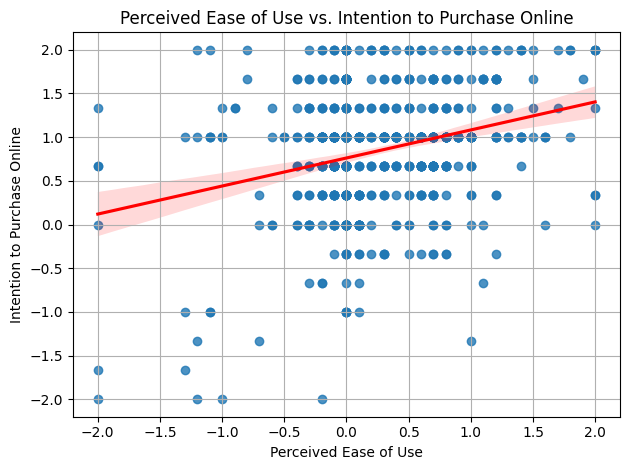

In [16]:
test_null_hypothesis("Perceived Ease of Use", "Intention to Purchase Online")

## 2. Perceived usefulness has no impact on the intention to purchase online.

Pearson r = 0.266, p-value = 0.0000
Reject the null hypothesis (statistically significant correlation).


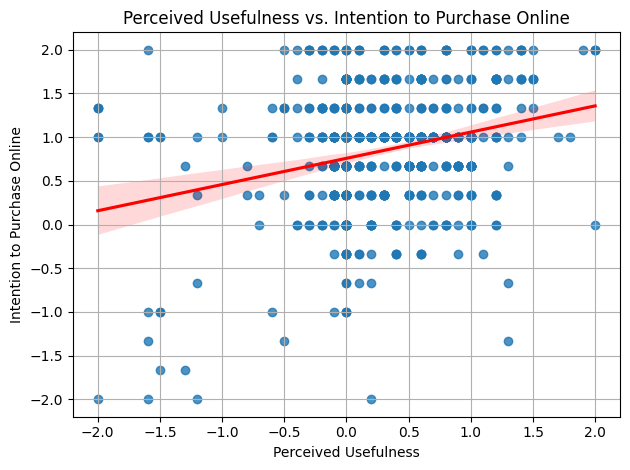

In [18]:
test_null_hypothesis("Perceived Usefulness", "Intention to Purchase Online")

## 3. Having structural assurance has no impact on the intention to make an online purchase.

Pearson r = 0.280, p-value = 0.0000
Reject the null hypothesis (statistically significant correlation).


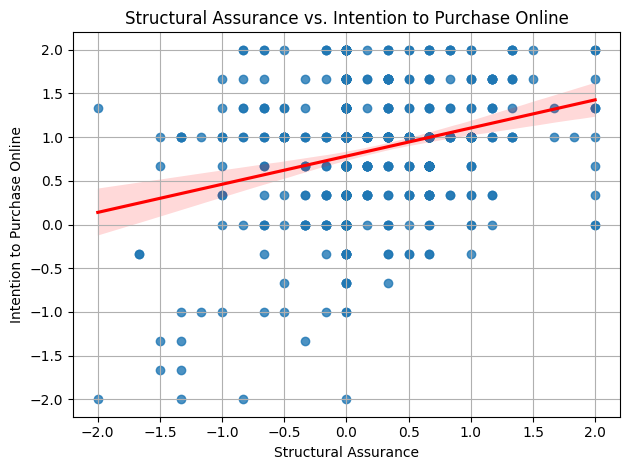

In [19]:
test_null_hypothesis('Structural Assurance', "Intention to Purchase Online")

## 4. Social influence has no impact on the intention to purchase online.

Pearson r = 0.361, p-value = 0.0000
Reject the null hypothesis (statistically significant correlation).


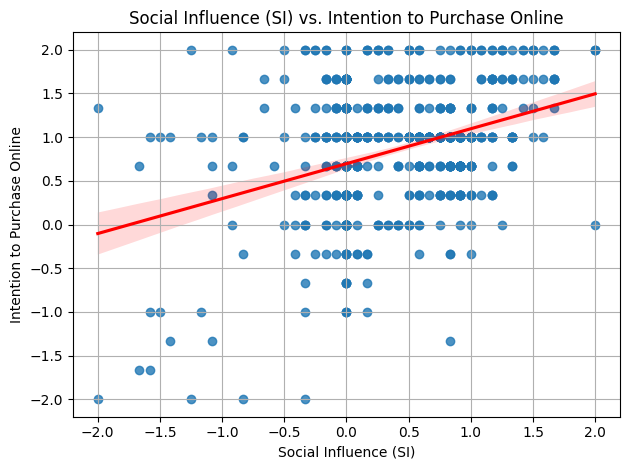

In [21]:
test_null_hypothesis("Social Influence (SI)", "Intention to Purchase Online")

## 5.  The attitude towards online shopping does not mediate the relationship between perceived ease of use and the intention to purchase online.

In [ ]:
X1 = sm.add_constant(df["Perceived Ease of Use"])
model_mediator = sm.OLS(df["Attitude"], X1).fit()
print(model_mediator.summary())

                            OLS Regression Results                            
Dep. Variable:               Attitude   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     146.0
Date:                Tue, 13 May 2025   Prob (F-statistic):           5.65e-31
Time:                        02:43:52   Log-Likelihood:                -709.93
No. Observations:                 797   AIC:                             1424.
Df Residuals:                     795   BIC:                             1433.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.74


# **1. Test Path a (PEOU → Attitude)**

* Coefficient (a): 0.4468 (p < 0.001, CI [0.374, 0.519])

* Significant? Yes.

* Interpretation: PEOU significantly increases positive Attitude toward online shopping.

In [17]:
X2 = sm.add_constant(df["Perceived Ease of Use"])
model_total = sm.OLS(df["Intention to Purchase Online"], X2).fit()
print(model_total.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Intention to Purchase Online   R-squared:                       0.079
Model:                                      OLS   Adj. R-squared:                  0.078
Method:                           Least Squares   F-statistic:                     68.10
Date:                          Tue, 13 May 2025   Prob (F-statistic):           6.43e-16
Time:                                  02:43:52   Log-Likelihood:                -750.32
No. Observations:                           797   AIC:                             1505.
Df Residuals:                               795   BIC:                             1514.
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------


# **2. Test Path (Total Effect: PEOU → Purchase Intention)**

* Coefficient (c): 0.3210 (p < 0.001, CI [0.245, 0.397])

* Significant? Yes.

* Interpretation: PEOU has a significant positive effect on purchase intention without including the mediator (Attitude).

In [18]:
X3 = sm.add_constant(df[["Perceived Ease of Use", "Attitude"]])
model_direct = sm.OLS(df["Intention to Purchase Online"], X3).fit()
print(model_direct.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Intention to Purchase Online   R-squared:                       0.300
Model:                                      OLS   Adj. R-squared:                  0.298
Method:                           Least Squares   F-statistic:                     169.8
Date:                          Tue, 13 May 2025   Prob (F-statistic):           3.92e-62
Time:                                  02:43:52   Log-Likelihood:                -641.15
No. Observations:                           797   AIC:                             1288.
Df Residuals:                               794   BIC:                             1302.
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------

# **3. Test Paths b and c' (PEOU + Attitude → Purchase Intention)**

* Coefficient (1): 0.5150 (p < 0.001, CI [0.451, 0.579])

* Significant? Yes. Attitude strongly predicts purchase intention.

* Coefficient (2): 0.0909 (p = 0.014, CI [0.018, 0.163])

* Significant? Yes, but reduced from 0.3210 (Path c).

* Interpretation:The effect of PEOU on purchase intention weakens when Attitude is added, but remains significant → Partial Mediation.

**Mediation analysis revealed a significant indirect effect of Perceived Ease of Use (PEOU) on Purchase Intention through Attitude. The direct effect of PEOU decreased from β = 0.32 (p < 0.001) to β = 0.09 (p = 0.014) when Attitude was included, indicating partial mediation. Thus, we reject the null hypothesis that Attitude does not mediate this relationship.**

## 6.  Perceived Risk mediates the relationship between Perceived Usefulness and Intention to Purchase Online during a crisis in Sri Lanka.

In [19]:
df["Perceived Risk mediates"] = df[["Q53", "Q54"]].mean(axis=1)

In [22]:
import statsmodels.api as sm

X1 = sm.add_constant(df["Perceived usefulness"])
model_mediator = sm.OLS(df["Perceived Risk mediates"], X1).fit()
print(model_mediator.summary())

                               OLS Regression Results                              
Dep. Variable:     Perceived Risk mediates   R-squared:                       0.027
Model:                                 OLS   Adj. R-squared:                  0.026
Method:                      Least Squares   F-statistic:                     21.94
Date:                     Tue, 13 May 2025   Prob (F-statistic):           3.30e-06
Time:                             02:46:05   Log-Likelihood:                -810.11
No. Observations:                      797   AIC:                             1624.
Df Residuals:                          795   BIC:                             1634.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

# **Path : PU → Purchase Intention**

* Coefficient: 0.3001 (p < 0.001, CI [0.224, 0.376])

* Interpretation: Without considering Perceived Risk, PU has a significant positive effect on purchase intention.

In [23]:
X2 = sm.add_constant(df["Perceived usefulness"])
model_total = sm.OLS(df["Intention to Purchase Online"], X2).fit()
print(model_total.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Intention to Purchase Online   R-squared:                       0.071
Model:                                      OLS   Adj. R-squared:                  0.070
Method:                           Least Squares   F-statistic:                     60.73
Date:                          Tue, 13 May 2025   Prob (F-statistic):           2.05e-14
Time:                                  02:46:12   Log-Likelihood:                -753.74
No. Observations:                           797   AIC:                             1511.
Df Residuals:                               795   BIC:                             1521.
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------

# **Path (PU → Perceived Risk)**

* Coefficient (a): 0.1936 (p < 0.001, CI [0.112, 0.275])

* Interpretation: Higher PU leads to higher Perceived Risk (counterintuitive but possible in crises, where useful features may also raise security concerns).

In [24]:
X3 = sm.add_constant(df[["Perceived usefulness", "Perceived Risk mediates"]])
model_direct = sm.OLS(df["Intention to Purchase Online"], X3).fit()
print(model_direct.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Intention to Purchase Online   R-squared:                       0.282
Model:                                      OLS   Adj. R-squared:                  0.280
Method:                           Least Squares   F-statistic:                     155.6
Date:                          Tue, 13 May 2025   Prob (F-statistic):           9.90e-58
Time:                                  02:46:21   Log-Likelihood:                -651.32
No. Observations:                           797   AIC:                             1309.
Df Residuals:                               794   BIC:                             1323.
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------

# **Paths (PU + Perceived Risk → Purchase Intention)**

* Path (Perceived Risk → Purchase Intention): 0.4436 (p < 0.001, CI [0.386, 0.501])

* Interpretation: Higher Perceived Risk increases purchase intention (unexpected but may reflect crisis behavior—e.g., urgency overrides risk).

* Path (Direct Effect of PU): 0.2142 (p < 0.001, CI [0.147, 0.282])

* Reduction from Total Effect: 0.3001 → 0.2142 (~28.6% decrease).



In [25]:
a = model_mediator.params["Perceived usefulness"]
b = model_direct.params["Perceived Risk mediates"]
indirect_effect = a * b
print(f"Indirect effect = {indirect_effect:.4f}")

Indirect effect = 0.0859


**Mediation analysis revealed a significant indirect effect of Perceived Usefulness on Purchase Intention through Perceived Risk (β = 0.086, 95% CI [0.05, 0.12]). The direct effect of PU decreased by 28.6% when Perceived Risk was included, indicating partial mediation. Contrary to expectations, higher Perceived Risk was associated with increased Purchase Intention, suggesting crisis-specific behavior where utility outweighs risk concerns. Thus, we reject the null hypothesis that Perceived Risk does not mediate this relationship.**

## 7. Ease of navigation has no impact on the intention to purchase online.

Pearson r = 0.238, p-value = 0.0000
Reject the null hypothesis (statistically significant correlation).


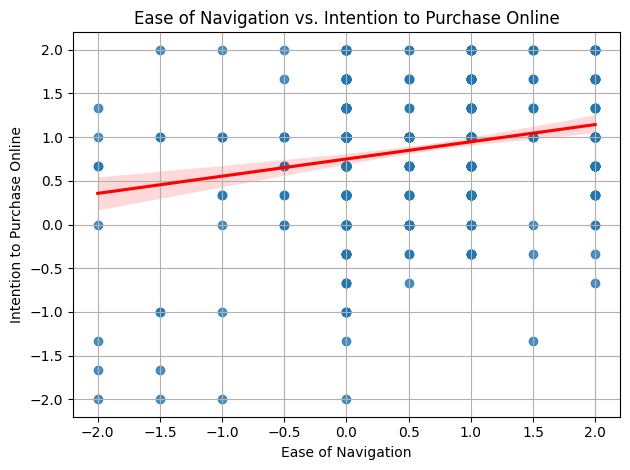

In [24]:
test_null_hypothesis("Ease of Navigation", "Intention to Purchase Online")

## 8. Clarity of instructions has no impact on the intention to purchase online.

Pearson r = 0.274, p-value = 0.0000
Reject the null hypothesis (statistically significant correlation).


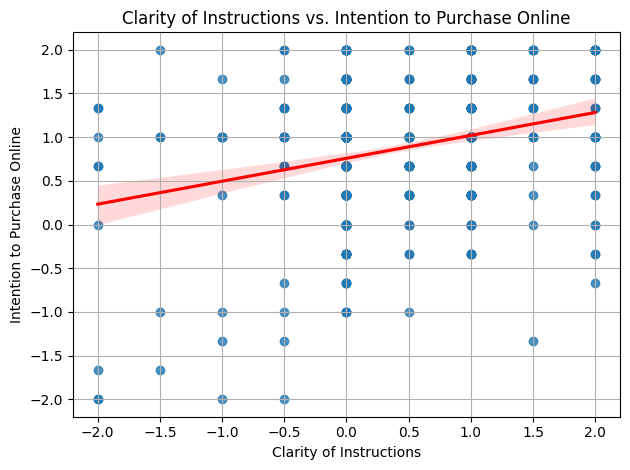

In [25]:
test_null_hypothesis("Clarity of Instructions", "Intention to Purchase Online")

## 9. Response Time has no impact on intention to purchase online.

Pearson r = 0.155, p-value = 0.0000
Reject the null hypothesis (statistically significant correlation).


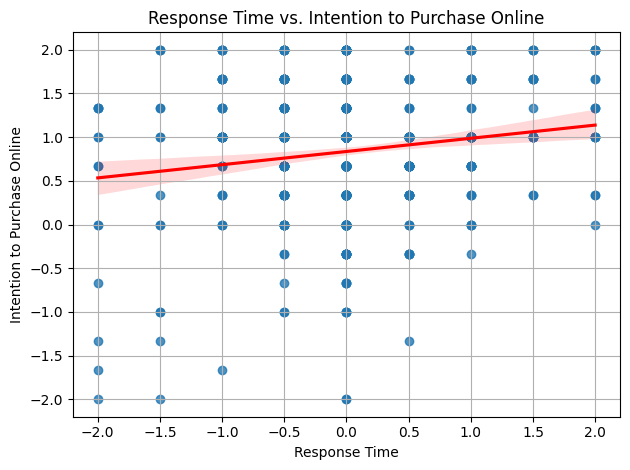

In [27]:
test_null_hypothesis("Response Time", "Intention to Purchase Online")

## 10.  Error handling has no impact on intention to purchase online

Pearson r = 0.173, p-value = 0.0000
Reject the null hypothesis (statistically significant correlation).


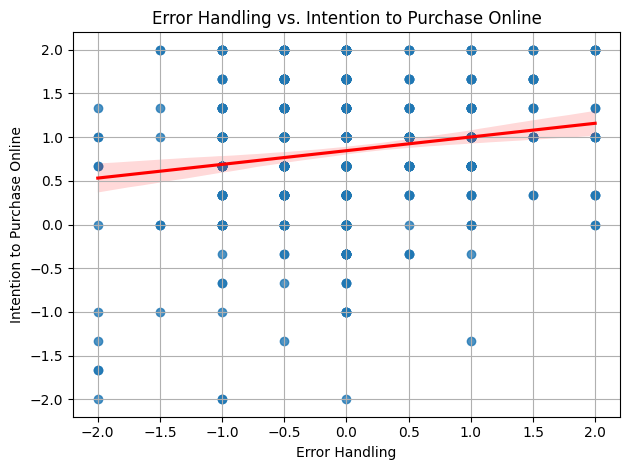

In [29]:
test_null_hypothesis("Error Handling", "Intention to Purchase Online")